In [1]:
import numpy as np 
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas.plotting import autocorrelation_plot
%matplotlib inline
import matplotlib.pyplot as plt
import os
##print(os.listdir("../input"))

In [2]:
df = pd.read_csv('C:\Acadgild Desk\salesofshampoo.csv')

In [3]:
df.head

<bound method NDFrame.head of                                         Month  \
0                                        1-01   
1                                        1-02   
2                                        1-03   
3                                        1-04   
4                                        1-05   
5                                        1-06   
6                                        1-07   
7                                        1-08   
8                                        1-09   
9                                        1-10   
10                                       1-11   
11                                       1-12   
12                                       2-01   
13                                       2-02   
14                                       2-03   
15                                       2-04   
16                                       2-05   
17                                       2-06   
18                                     

In [4]:
df=df.dropna()
df

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [5]:
##df['Date']=pd.to_datetime('190'+df.Month,format='%Y-%m')
df['Date']=pd.to_datetime('200'+df.Month,format='%Y-%m')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df.head()

,Month,Sales of shampoo over a three year period,Date
0,1-01,266.0,2001-01-01
1,1-02,145.9,2001-02-01
2,1-03,183.1,2001-03-01
3,1-04,119.3,2001-04-01
4,1-05,180.3,2001-05-01


In [7]:
df=df.drop(columns=['Month'])
df.head()

,Sales of shampoo over a three year period,Date
0,266.0,2001-01-01
1,145.9,2001-02-01
2,183.1,2001-03-01
3,119.3,2001-04-01
4,180.3,2001-05-01


In [8]:
df.set_index('Date',inplace=True)

In [9]:
df.head()

,Sales of shampoo over a three year period
Date,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2001-01-01 to 2003-12-01
Data columns (total 1 columns):
Sales of shampoo over a three year period    36 non-null float64
dtypes: float64(1)
memory usage: 576.0 bytes


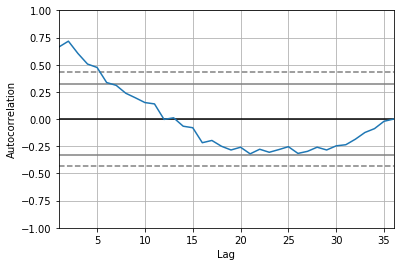

In [11]:

autocorrelation_plot(df)
plt.show()

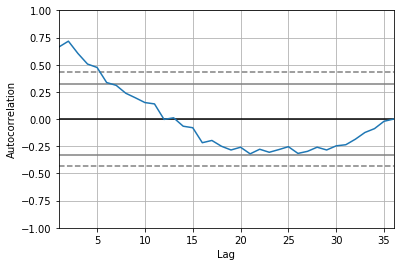

In [12]:
pd.plotting.autocorrelation_plot(df)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Sun, 21 Jul 2019   AIC                            406.340
Time:                                                 20:10:45   BIC                            417.227
Sample:                                             02-01-2001   HQIC                           410.098
                                                  - 12-01-2003                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

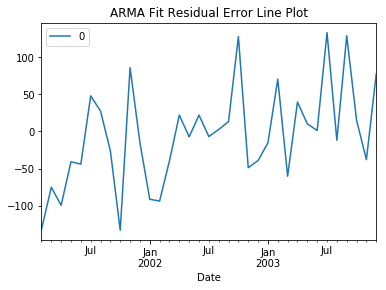

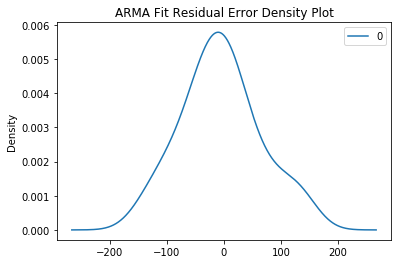

                0
count   35.000000
mean    -5.495295
std     68.132877
min   -133.296686
25%    -42.477964
50%     -7.186673
75%     24.748258
max    133.237889


In [13]:
from statsmodels.tsa.arima_model import ARIMA


model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()
print(residuals.describe())